In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Warsaw_flat_prices_25_Sep_22.csv")

In [3]:
df.head(10)

,Location,Price,Price per m2,Size M2,Rooms
0,"Warszawa, Praga-Północ",396 000 zł,13 655 zł/m²,29 m²,2 pokoje
1,"Warszawa, Bemowo, ul. Secemińska",695 000 zł,11 564 zł/m²,60.1 m²,3 pokoje
2,"Warszawa, Wilanów",828 000 zł,15 055 zł/m²,55 m²,2 pokoje
3,"Warszawa, Białołęka",730 000 zł,13 225 zł/m²,55.2 m²,3 pokoje
4,"Warszawa, Śródmieście, ul. Marszałkowska 111a",750 000 zł,19 330 zł/m²,38.8 m²,2 pokoje
5,"Warszawa, Śródmieście, Nowy Świat",1 500 000 zł,17 964 zł/m²,83.5 m²,3 pokoje
6,"Warszawa, Ursynów, Imielin, Polinezyjska",700 000 zł,10 160 zł/m²,68.9 m²,4 pokoje
7,"Warszawa, Mokotów, Sielce",980 000 zł,16 554 zł/m²,59.2 m²,3 pokoje
8,"Warszawa, Mokotów, Dolny Mokotów",1 899 500 zł,12 099 zł/m²,157 m²,4 pokoje
9,"Warszawa, Mokotów",600 000 zł,12 747 zł/m²,47.07 m²,3 pokoje


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      11250 non-null  object
 1   Price         11250 non-null  object
 2   Price per m2  11250 non-null  object
 3   Size M2       11250 non-null  object
 4   Rooms         11250 non-null  object
dtypes: object(5)
memory usage: 439.6+ KB


## Data Cleaning

### Row "Location"  data cleaning

In [5]:
df["Location"]

0                               Warszawa, Praga-Północ
1                     Warszawa, Bemowo, ul. Secemińska
2                                    Warszawa, Wilanów
3                                  Warszawa, Białołęka
4        Warszawa, Śródmieście, ul. Marszałkowska 111a
                             ...                      
11245                                Warszawa, Ursynów
11246            Warszawa, Ochota, Aleje Jerozolimskie
11247                Warszawa, Śródmieście, Mokotowska
11248                 Warszawa, Śródmieście, Traugutta
11249                           Warszawa, Praga-Północ
Name: Location, Length: 11250, dtype: object

In [6]:
SplitedLocation = df["Location"].str.split(",")
SplitedLocation

0                                [Warszawa,  Praga-Północ]
1                     [Warszawa,  Bemowo,  ul. Secemińska]
2                                     [Warszawa,  Wilanów]
3                                   [Warszawa,  Białołęka]
4        [Warszawa,  Śródmieście,  ul. Marszałkowska 111a]
                               ...                        
11245                                 [Warszawa,  Ursynów]
11246            [Warszawa,  Ochota,  Aleje Jerozolimskie]
11247                [Warszawa,  Śródmieście,  Mokotowska]
11248                 [Warszawa,  Śródmieście,  Traugutta]
11249                            [Warszawa,  Praga-Północ]
Name: Location, Length: 11250, dtype: object

Making columns for city, district and alley

In [7]:
city = []
district = []
alley = []
for i in range(len(SplitedLocation)):
    try:
        city.append(SplitedLocation[i][0].strip())
        district.append(SplitedLocation[i][1].strip())
        alley.append(SplitedLocation[i][2:][0].strip())
    except IndexError:
        alley.append("None")

In [8]:
print("Orginal Location for index 1: ", SplitedLocation[0])
print("OLocation for splited index 1: ", (city[0], district[0], alley[0]))

Orginal Location for index 1:  ['Warszawa', ' Praga-Północ']
OLocation for splited index 1:  ('Warszawa', 'Praga-Północ', 'None')


In [9]:
df["City"] = city
df["District"] = district
df["Alley"] = alley

In [10]:
df["City"].value_counts()

City
Warszawa                              11229
Dyrekcyjna                                2
Jana Szymczaka                            2
Edwarda Habicha                           1
Al. Prymasa Tysiąclecia                   1
Władysława Broniewskiego (Bielany)        1
Herbu Oksza                               1
Wspólna Droga                             1
Oskara Langego                            1
ul. Dywizjonu 303                         1
ul. Zagłoby                               1
ul. Jana Feliksa Piwarskiego              1
Imielin                                   1
Głębocka                                  1
gen. Meriana C. Coopera                   1
Związku Walki Młodych                     1
Coopera                                   1
Broniewskiego 24a                         1
Wiktoryn                                  1
Zagłoby                                   1
Name: count, dtype: int64

In [11]:
df["District"].value_counts()

District
Mokotów             1730
Wola                1180
Śródmieście         1128
Praga-Południe      1080
Białołęka            784
Ursynów              741
Bielany              685
Bemowo               594
Ochota               579
Targówek             523
Wilanów              466
Żoliborz             398
Ursus                391
Praga-Północ         296
Włochy               254
Wawer                166
Wesoła                82
Rembertów             66
mazowieckie           60
Centrum               25
Warszawa              19
56E                    1
Hirszfelda             1
Metro Wilanowska       1
Name: count, dtype: int64

In [12]:
df = df.drop("Location", axis=1)
df

,Price,Price per m2,Size M2,Rooms,City,District,Alley
0,396 000 zł,13 655 zł/m²,29 m²,2 pokoje,Warszawa,Praga-Północ,None
1,695 000 zł,11 564 zł/m²,60.1 m²,3 pokoje,Warszawa,Bemowo,ul. Secemińska
2,828 000 zł,15 055 zł/m²,55 m²,2 pokoje,Warszawa,Wilanów,None
3,730 000 zł,13 225 zł/m²,55.2 m²,3 pokoje,Warszawa,Białołęka,None
4,750 000 zł,19 330 zł/m²,38.8 m²,2 pokoje,Warszawa,Śródmieście,ul. Marszałkowska 111a
...,...,...,...,...,...,...,...
11245,550 000 zł,11 224 zł/m²,49 m²,2 pokoje,Warszawa,Ursynów,None
11246,1 530 000 zł,12 000 zł/m²,127.5 m²,3 pokoje,Warszawa,Ochota,Aleje Jerozolimskie
11247,1 230 000 €,10 000 €/m²,123 m²,3 pokoje,Warszawa,Śródmieście,Mokotowska
11248,1 295 000 zł,17 290 zł/m²,74.9 m²,3 pokoje,Warszawa,Śródmieście,Traugutta


In [13]:
df[df["City"]!="Warszawa"]

,Price,Price per m2,Size M2,Rooms,City,District,Alley
938,105 500 zł,2813 zł/m²,37.5 m²,2 pokoje,ul. Jana Feliksa Piwarskiego,Warszawa,mazowieckie
1654,258 000 zł,14 333 zł/m²,18 m²,1 pokój,Wiktoryn,Warszawa,mazowieckie
1705,389 000 zł,19 450 zł/m²,20 m²,1 pokój,Broniewskiego 24a,Warszawa,mazowieckie
2066,520 000 zł,15 200 zł/m²,34.21 m²,1 pokój,Coopera,Warszawa,mazowieckie
2717,1 269 000 zł,12 564 zł/m²,101 m²,3 pokoje,Związku Walki Młodych,Warszawa,mazowieckie
3642,990 000 zł,13 904 zł/m²,71.2 m²,3 pokoje,gen. Meriana C. Coopera,Warszawa,mazowieckie
3700,410 000 zł,11 081 zł/m²,37 m²,1 pokój,Głębocka,56E,Warszawa
3872,790 000 zł,12 951 zł/m²,61 m²,3 pokoje,Jana Szymczaka,Warszawa,mazowieckie
4935,599 000 zł,14 262 zł/m²,42 m²,2 pokoje,Imielin,Hirszfelda,Warszawa
4970,565 000 zł,9758 zł/m²,57.9 m²,4 pokoje,ul. Zagłoby,Warszawa,mazowieckie


Dropping rows where city is other than Warszawa because cant do anything with that row 

In [14]:
# Dropping rows where city is other than Warszawa beacuse cant do anything with that row 
drop_index = df[df["City"]!="Warszawa"].index
df = df.drop(drop_index, axis=0)

In [15]:
df["City"].value_counts()

City
Warszawa    11229
Name: count, dtype: int64

Metro Wilanowska and mazowieckie is not even District

In [16]:
df["District"].value_counts()

District
Mokotów             1730
Wola                1180
Śródmieście         1128
Praga-Południe      1080
Białołęka            784
Ursynów              741
Bielany              685
Bemowo               594
Ochota               579
Targówek             523
Wilanów              466
Żoliborz             398
Ursus                391
Praga-Północ         296
Włochy               254
Wawer                166
Wesoła                82
Rembertów             66
mazowieckie           60
Centrum               25
Metro Wilanowska       1
Name: count, dtype: int64

In [17]:
df[df["District"]=="mazowieckie"]

,Price,Price per m2,Size M2,Rooms,City,District,Alley
153,895 000 zł,15 169 zł/m²,59 m²,2 pokoje,Warszawa,mazowieckie,None
196,619 000 zł,12 430 zł/m²,49.8 m²,2 pokoje,Warszawa,mazowieckie,None
214,699 500 zł,8259 zł/m²,84.7 m²,4 pokoje,Warszawa,mazowieckie,None
965,1 649 000 zł,15 780 zł/m²,104.5 m²,5 pokoi,Warszawa,mazowieckie,None
988,540 000 zł,8438 zł/m²,64 m²,3 pokoje,Warszawa,mazowieckie,None
1122,525 000 zł,9722 zł/m²,54 m²,3 pokoje,Warszawa,mazowieckie,None
1217,510 500 zł,14 586 zł/m²,35 m²,2 pokoje,Warszawa,mazowieckie,None
1475,555 000 zł,11 660 zł/m²,47.6 m²,3 pokoje,Warszawa,mazowieckie,None
1480,560 000 zł,10 370 zł/m²,54 m²,2 pokoje,Warszawa,mazowieckie,None
1905,485 000 zł,13 826 zł/m²,35.08 m²,2 pokoje,Warszawa,mazowieckie,None


In [18]:
df[df["District"]=="Metro Wilanowska"]

,Price,Price per m2,Size M2,Rooms,City,District,Alley
7671,1 450 000 zł,12 609 zł/m²,115 m²,4 pokoje,Warszawa,Metro Wilanowska,None


Dropping districts: mazowieckie and Metro Wilanowska

In [19]:
drop_index = df[df["District"]=="mazowieckie"].index
drop_index2 = df[df["District"]=="Metro Wilanowska"].index
df = df.drop(drop_index, axis=0)
df = df.drop(drop_index2, axis=0)

In [20]:
df["District"].value_counts()

District
Mokotów           1730
Wola              1180
Śródmieście       1128
Praga-Południe    1080
Białołęka          784
Ursynów            741
Bielany            685
Bemowo             594
Ochota             579
Targówek           523
Wilanów            466
Żoliborz           398
Ursus              391
Praga-Północ       296
Włochy             254
Wawer              166
Wesoła              82
Rembertów           66
Centrum             25
Name: count, dtype: int64

Dropping also a Alley because we will explore data for other features

In [21]:
df = df.drop("Alley", axis=1)
df

,Price,Price per m2,Size M2,Rooms,City,District
0,396 000 zł,13 655 zł/m²,29 m²,2 pokoje,Warszawa,Praga-Północ
1,695 000 zł,11 564 zł/m²,60.1 m²,3 pokoje,Warszawa,Bemowo
2,828 000 zł,15 055 zł/m²,55 m²,2 pokoje,Warszawa,Wilanów
3,730 000 zł,13 225 zł/m²,55.2 m²,3 pokoje,Warszawa,Białołęka
4,750 000 zł,19 330 zł/m²,38.8 m²,2 pokoje,Warszawa,Śródmieście
...,...,...,...,...,...,...
11245,550 000 zł,11 224 zł/m²,49 m²,2 pokoje,Warszawa,Ursynów
11246,1 530 000 zł,12 000 zł/m²,127.5 m²,3 pokoje,Warszawa,Ochota
11247,1 230 000 €,10 000 €/m²,123 m²,3 pokoje,Warszawa,Śródmieście
11248,1 295 000 zł,17 290 zł/m²,74.9 m²,3 pokoje,Warszawa,Śródmieście


### Making Price, Price per m2, Size M2 and Rooms as numeric colums

#### Dealing with columns Price, Price per m2

There are some rows which have price in euros and one row with the price in dollars

In [22]:
df.loc[~df["Price"].str.contains("zł")]

,Price,Price per m2,Size M2,Rooms,City,District
500,1 884 000 €,"8589,01 €/m²",219.35 m²,6 pokoi,Warszawa,Śródmieście
743,1 100 000 €,"11 827,96 €/m²",93 m²,2 pokoje,Warszawa,Śródmieście
2867,990 000 €,"15 639,81 €/m²",63.3 m²,2 pokoje,Warszawa,Śródmieście
2868,1 100 000 €,"11 827,96 €/m²",93 m²,2 pokoje,Warszawa,Śródmieście
3460,240 000 €,"4807,69 €/m²",49.92 m²,2 pokoje,Warszawa,Żoliborz
5120,3 000 000 €,"12 658,23 €/m²",237 m²,5 pokoi,Warszawa,Śródmieście
6356,4 000 000 €,"17 699,12 €/m²",226 m²,3 pokoje,Warszawa,Mokotów
7386,590 000 €,"5339,37 €/m²",110.5 m²,3 pokoje,Warszawa,Mokotów
9546,1 900 000 €,"5177,11 €/m²",367 m²,4 pokoje,Warszawa,Śródmieście
10413,"$1,000,000","$6,097.56/m²",164 m²,3 pokoje,Warszawa,Wilanów


Saving indexes to multiply them by exchange rate in future

In [23]:
indexEuro = df.loc[df["Price"].str.contains("€")].index
indexDolar = 10413

Removing all unecessary symbols

In [24]:
df[["Price", "Price per m2"]] = df[["Price", "Price per m2"]].replace({"zł":""},regex=True)
df[["Price", "Price per m2"]] = df[["Price", "Price per m2"]].replace({"€":""},regex=True)
df[["Price", "Price per m2"]] = df[["Price", "Price per m2"]].replace({"$":""},regex=True)
df[["Price", "Price per m2"]] = df[["Price", "Price per m2"]].replace({",":"."},regex=True)
df[["Price", "Price per m2"]] = df[["Price", "Price per m2"]].replace({" ":""},regex=True)

Need to deal with dollar like special case

In [25]:
df.loc[10413]

Price             $1.000.000
Price per m2    $6.097.56/m²
Size M2               164 m²
Rooms               3 pokoje
City                Warszawa
District             Wilanów
Name: 10413, dtype: object

In [26]:
df.loc[10413] = df.loc[10413].str.replace("$1.000.000", "1000000", regex=False)
df.loc[10413] = df.loc[10413].str.replace("$6.097.56/m²", "6097.56", regex=False)

Dollar and Euros colums after clean

In [27]:
df.loc[10413]

Price            1000000
Price per m2     6097.56
Size M2           164 m²
Rooms           3 pokoje
City            Warszawa
District         Wilanów
Name: 10413, dtype: object

In [28]:
df.loc[indexEuro]

,Price,Price per m2,Size M2,Rooms,City,District
500,1884000,8589.01/m²,219.35 m²,6 pokoi,Warszawa,Śródmieście
743,1100000,11827.96/m²,93 m²,2 pokoje,Warszawa,Śródmieście
2867,990000,15639.81/m²,63.3 m²,2 pokoje,Warszawa,Śródmieście
2868,1100000,11827.96/m²,93 m²,2 pokoje,Warszawa,Śródmieście
3460,240000,4807.69/m²,49.92 m²,2 pokoje,Warszawa,Żoliborz
5120,3000000,12658.23/m²,237 m²,5 pokoi,Warszawa,Śródmieście
6356,4000000,17699.12/m²,226 m²,3 pokoje,Warszawa,Mokotów
7386,590000,5339.37/m²,110.5 m²,3 pokoje,Warszawa,Mokotów
9546,1900000,5177.11/m²,367 m²,4 pokoje,Warszawa,Śródmieście
10765,210000,2896.15/m²,72.51 m²,3 pokoje,Warszawa,Targówek


#### Dealing with column Rooms

In [29]:
df["Rooms"].unique()

array(['2 pokoje', '3 pokoje', '4 pokoje', '6 pokoi', '1 pokój',
       '5 pokoi', '7 pokoi', '8 pokoi', '10 pokoi', '10+ pokoi'],
      dtype=object)

In [30]:
df[df["Rooms"] == "10+ pokoi"]

,Price,Price per m2,Size M2,Rooms,City,District
2744,433000,12628/m²,34.29 m²,10+ pokoi,Warszawa,Żoliborz
8064,5490000,14485/m²,379 m²,10+ pokoi,Warszawa,Śródmieście


In [31]:
df[df["Rooms"] == "10 pokoi"]

,Price,Price per m2,Size M2,Rooms,City,District
1378,1900000,7725/m²,245.95 m²,10 pokoi,Warszawa,Włochy
8806,1800000,5143/m²,350 m²,10 pokoi,Warszawa,Ursynów
10311,21350100,43773/m²,487.75 m²,10 pokoi,Warszawa,Śródmieście


In [32]:
df[df["Rooms"] == "1 pokój"]

,Price,Price per m2,Size M2,Rooms,City,District
11,485000,15156/m²,32 m²,1 pokój,Warszawa,Bemowo
40,430000,11286/m²,38.1 m²,1 pokój,Warszawa,Białołęka
42,975000,27144/m²,35.92 m²,1 pokój,Warszawa,Śródmieście
43,534000,17508/m²,30.5 m²,1 pokój,Warszawa,Praga-Północ
45,410000,11081/m²,37 m²,1 pokój,Warszawa,Białołęka
...,...,...,...,...,...,...
11193,499000,16097/m²,31 m²,1 pokój,Warszawa,Praga-Południe
11199,445000,13284/m²,33.5 m²,1 pokój,Warszawa,Praga-Północ
11209,499000,16097/m²,31 m²,1 pokój,Warszawa,Praga-Południe
11227,575000,18548/m²,31 m²,1 pokój,Warszawa,Bielany


Index 2744 has an incorrect number of rooms

In [33]:
df["Rooms"].loc[2744]

'10+ pokoi'

Replacing numer of rooms

In [34]:
df["Rooms"].loc[2744] = df["Rooms"].loc[2744].replace("10+ pokoi", "1 pokój")
df["Rooms"].loc[2744]

'1 pokój'

In [35]:
df[df["Rooms"] == "10+ pokoi"]

,Price,Price per m2,Size M2,Rooms,City,District
8064,5490000,14485/m²,379 m²,10+ pokoi,Warszawa,Śródmieście


#### Changing other

Removing string elements from Price per m2, Size M2 and Rooms

In [36]:
df["Price per m2"] = df["Price per m2"].str.replace("/m²", "")
df["Size M2"] = df["Size M2"].str.replace("m²", "")
df["Rooms"] = df["Rooms"].str.replace('\D', '', regex=True)

Removing space from objects

In [37]:
df.select_dtypes(['object']).apply(lambda x: x.str.strip())

,Price,Price per m2,Size M2,Rooms,City,District
0,396000,13655,29,2,Warszawa,Praga-Północ
1,695000,11564,60.1,3,Warszawa,Bemowo
2,828000,15055,55,2,Warszawa,Wilanów
3,730000,13225,55.2,3,Warszawa,Białołęka
4,750000,19330,38.8,2,Warszawa,Śródmieście
...,...,...,...,...,...,...
11245,550000,11224,49,2,Warszawa,Ursynów
11246,1530000,12000,127.5,3,Warszawa,Ochota
11247,1230000,10000,123,3,Warszawa,Śródmieście
11248,1295000,17290,74.9,3,Warszawa,Śródmieście


In [38]:
df = df.astype({'Price':'float', 'Price per m2':'float', 'Size M2':'float', 'Rooms':'int'})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11168 entries, 0 to 11249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         11168 non-null  float64
 1   Price per m2  11168 non-null  float64
 2   Size M2       11168 non-null  float64
 3   Rooms         11168 non-null  int32  
 4   City          11168 non-null  object 
 5   District      11168 non-null  object 
dtypes: float64(3), int32(1), object(2)
memory usage: 825.2+ KB


1. exchange rate euro sept 2022: 1€ = 4,78 zł.
2. exchange rate dolar sept 2022: 1$ = 4,86 zł

In [40]:
df.loc[indexDolar, ["Price", "Price per m2"]]

Price           1000000.0
Price per m2      6097.56
Name: 10413, dtype: object

In [41]:
df.loc[indexDolar, ["Price", "Price per m2"]] = df.loc[indexDolar, ["Price", "Price per m2"]] * 4.86

In [42]:
df.loc[indexDolar, ["Price", "Price per m2"]]

Price            4860000.0
Price per m2    29634.1416
Name: 10413, dtype: object

In [43]:
df.loc[indexEuro, ["Price", "Price per m2"]]

,Price,Price per m2
500,1884000.0,8589.01
743,1100000.0,11827.96
2867,990000.0,15639.81
2868,1100000.0,11827.96
3460,240000.0,4807.69
5120,3000000.0,12658.23
6356,4000000.0,17699.12
7386,590000.0,5339.37
9546,1900000.0,5177.11
10765,210000.0,2896.15


In [44]:
df.loc[indexEuro, ["Price", "Price per m2"]] = df.loc[indexEuro, ["Price", "Price per m2"]] * 4.78 

In [45]:
df.loc[indexEuro, ["Price", "Price per m2"]]

,Price,Price per m2
500,9005520.0,41055.4678
743,5258000.0,56537.6488
2867,4732200.0,74758.2918
2868,5258000.0,56537.6488
3460,1147200.0,22980.7582
5120,14340000.0,60506.3394
6356,19120000.0,84601.7936
7386,2820200.0,25522.1886
9546,9082000.0,24746.5858
10765,1003800.0,13843.5970


In [46]:
df = df.round(2) 

Change column names

In [47]:
df = df.rename(columns={"Price":"Price for house in zl", "Price per m2":"Price per m2 in zl" })

In [48]:
df

,Price for house in zl,Price per m2 in zl,Size M2,Rooms,City,District
0,396000.0,13655.0,29.0,2,Warszawa,Praga-Północ
1,695000.0,11564.0,60.1,3,Warszawa,Bemowo
2,828000.0,15055.0,55.0,2,Warszawa,Wilanów
3,730000.0,13225.0,55.2,3,Warszawa,Białołęka
4,750000.0,19330.0,38.8,2,Warszawa,Śródmieście
...,...,...,...,...,...,...
11245,550000.0,11224.0,49.0,2,Warszawa,Ursynów
11246,1530000.0,12000.0,127.5,3,Warszawa,Ochota
11247,5879400.0,47800.0,123.0,3,Warszawa,Śródmieście
11248,1295000.0,17290.0,74.9,3,Warszawa,Śródmieście


Dropping rows with Houses below 25 m^2 because is not a house in Polish law

In [49]:
df = df.drop(df[df["Size M2"] < 25].index, axis=0)

<Axes: xlabel='Price per m2 in zl'>

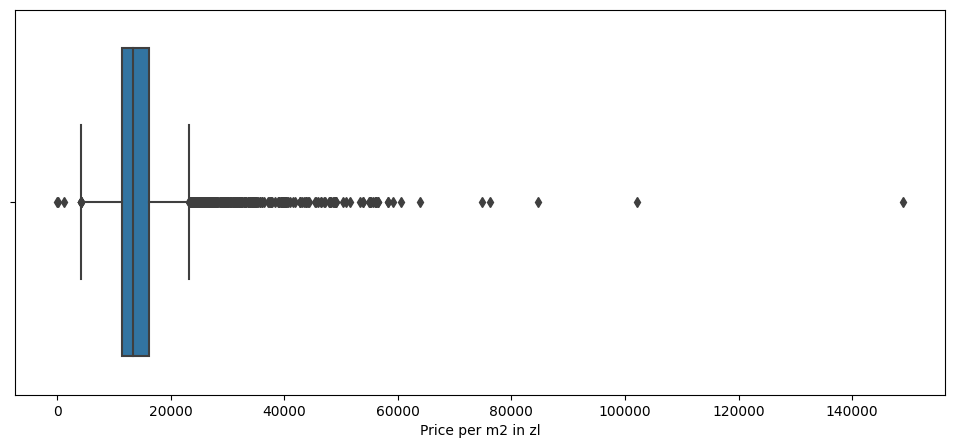

In [50]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Price per m2 in zl", )

#### Countng outerliers for Price per m2 in zl

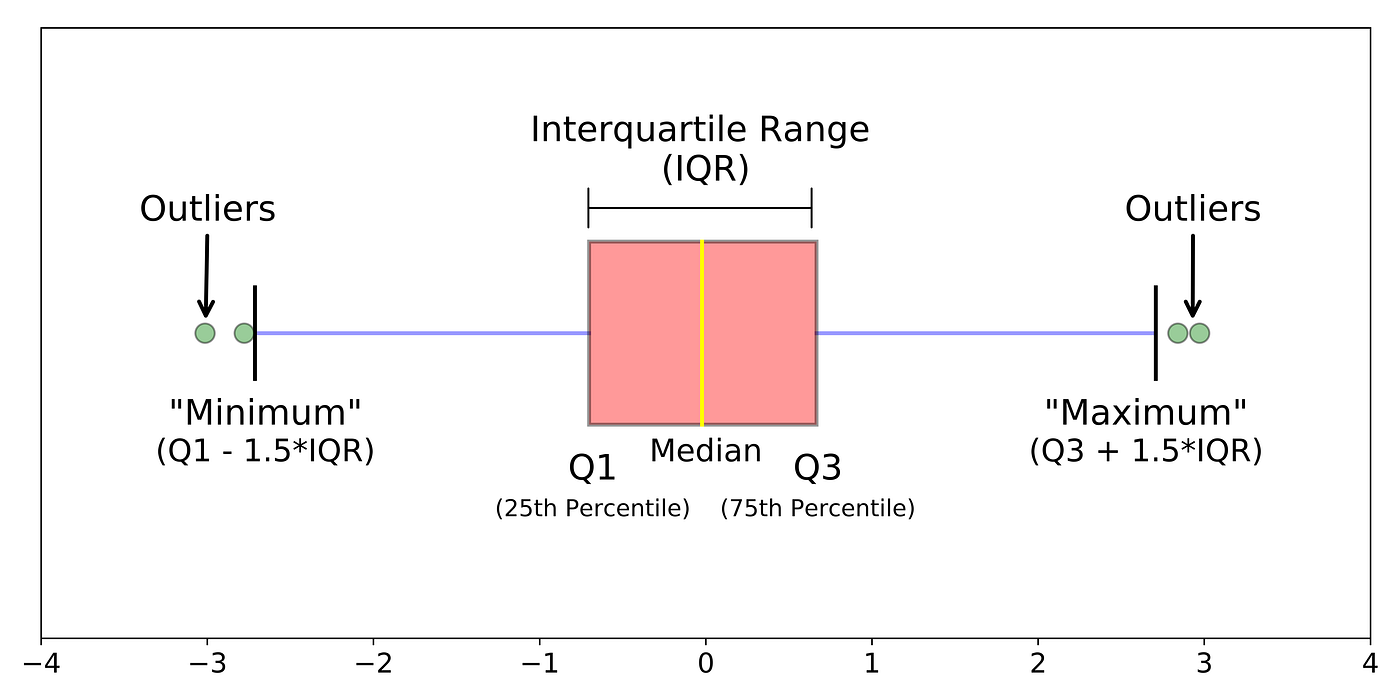
https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

In [51]:
q75, q25 = np.percentile(df["Price per m2 in zl"], [75, 25])
iqrLow = q75 -q25
iqrLow

4751.0

In [52]:
df[df["Price per m2 in zl"] < iqrLow]

,Price for house in zl,Price per m2 in zl,Size M2,Rooms,City,District
823,310000.00,4593.0,67.50,3,Warszawa,Bemowo
924,699000.00,4161.0,168.00,6,Warszawa,Wawer
998,659000.00,1.0,660000.00,3,Warszawa,Praga-Południe
1657,5900.00,76.0,78.00,3,Warszawa,Praga-Północ
4156,65450.00,1230.0,53.20,3,Warszawa,Targówek
5544,699000.00,4424.0,158.00,5,Warszawa,Wawer
5754,699000.00,4161.0,168.00,6,Warszawa,Wawer
6961,699000.00,4161.0,168.00,6,Warszawa,Wawer
8875,189146.25,4274.0,44.25,3,Warszawa,Ochota
8888,699000.00,4161.0,168.00,6,Warszawa,Wawer


Dropping rows under lower limit

In [53]:
df = df.drop(df[df["Price per m2 in zl"] < iqrLow].index, axis=0)

In [54]:
q75, q25 = np.percentile(df["Price per m2 in zl"], [75, 25])
iqrUp = q75 + q25
iqrUp

27489.5

In [55]:
len(df[df["Price per m2 in zl"] < iqrUp])

10731

In [56]:
len(df[df["Price per m2 in zl"] > 60000])

7

Dropping rows over 60000 zl per m2

In [57]:
df = df.drop(df[df["Price per m2 in zl"] > 60000].index, axis=0)

## Vizualisation

In [58]:
df.describe().round(2)

,Price for house in zl,Price per m2 in zl,Size M2,Rooms
count,10964.00,10964.00,10964.00,10964.00
mean,958988.67,14425.40,63.22,2.65
std,996868.06,4991.95,36.24,0.97
min,145000.00,4785.00,25.00,1.00
25%,555000.00,11366.75,44.00,2.00
50%,699000.00,13324.00,54.50,3.00
75%,969000.00,16107.25,70.00,3.00
max,21600000.00,59072.00,560.00,10.00


<Axes: xlabel='Price per m2 in zl'>

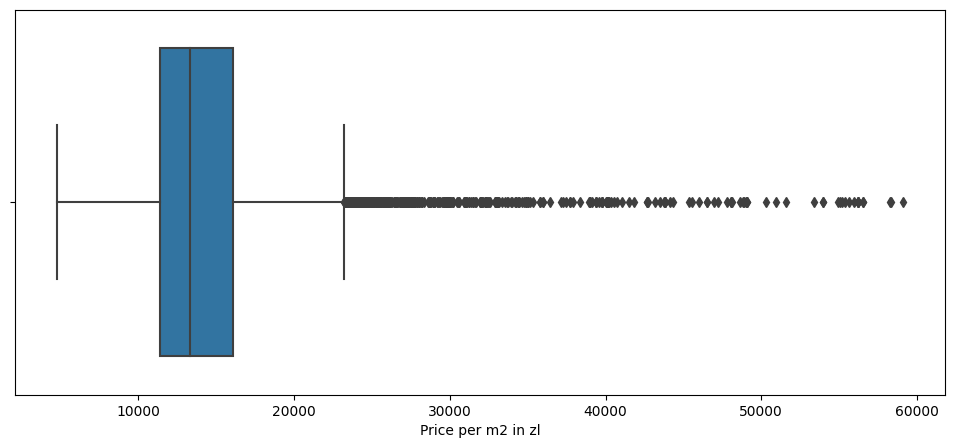

In [59]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Price per m2 in zl", )

D:\Anaconda3\envs\training\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


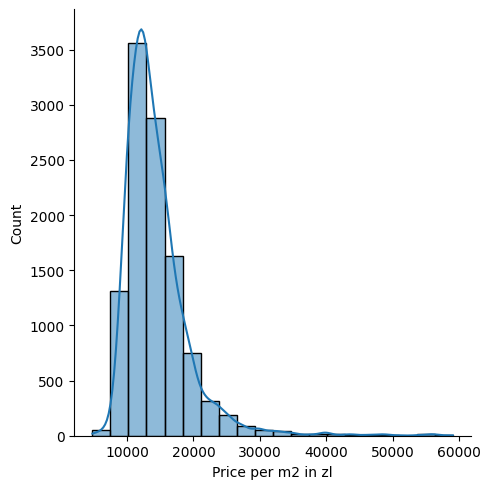

In [60]:
sns.displot(data=df, x="Price per m2 in zl", bins=20, kde=True)

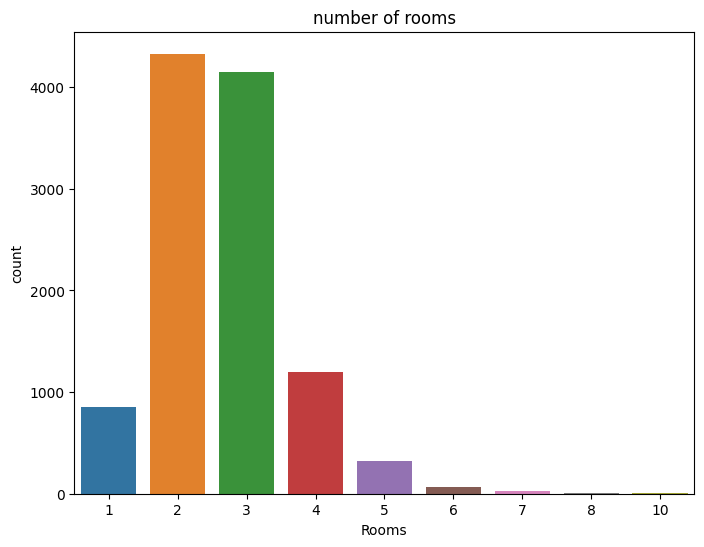

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Rooms")
plt.title("number of rooms");

In [62]:
# Average size per one room
(df["Size M2"] / df["Rooms"]).mean()

23.89957612033321

In [63]:
df.groupby("Rooms")[["Size M2", "Price per m2 in zl"]].mean().round(2)

,Size M2,Price per m2 in zl
Rooms,,
1,32.44,15296.42
2,46.07,14455.12
3,65.92,13739.52
4,100.33,15311.94
5,150.51,16320.08
6,206.42,17189.77
7,219.84,17133.77
8,265.67,19005.40
10,365.68,17781.50


<Axes: xlabel='Price per m2 in zl', ylabel='Size M2'>

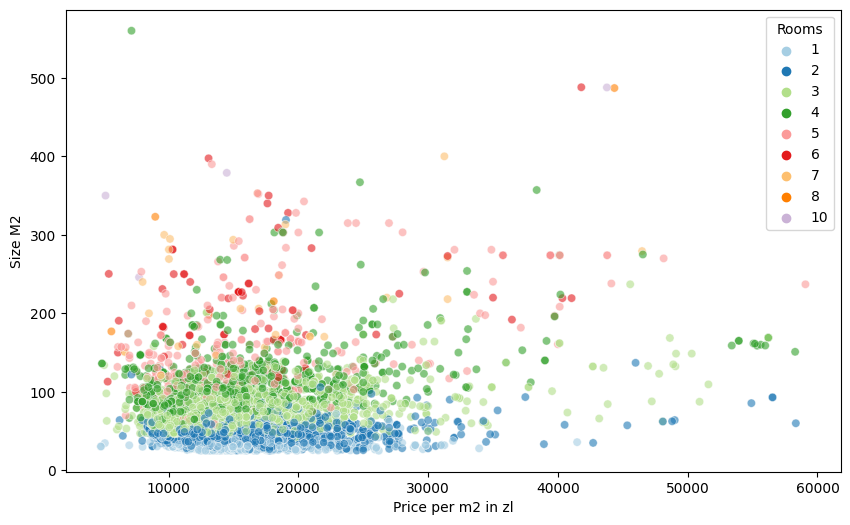

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y="Size M2", x="Price per m2 in zl" ,alpha=0.6, hue="Rooms",  palette="Paired")

In [65]:
df.groupby("District")[["Price per m2 in zl", "Size M2", "Rooms"]].mean().sort_values(ascending=True, by="Price per m2 in zl").round(2)

,Price per m2 in zl,Size M2,Rooms
District,,,
Rembertów,9845.05,63.12,2.74
Wesoła,10287.71,72.82,3.06
Wawer,10299.06,79.09,3.13
Białołęka,10490.16,57.55,2.58
Ursus,11165.70,56.17,2.63
Targówek,11317.35,56.05,2.61
Bemowo,12201.61,63.70,2.80
Bielany,12780.63,54.56,2.52
Włochy,12906.28,57.93,2.51


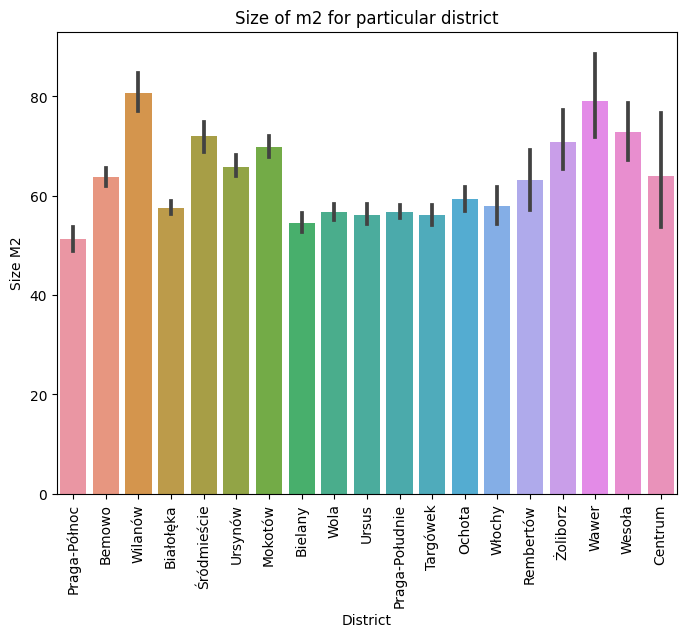

In [66]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="District", y="Size M2")
plt.title("Size of m2 for particular district")
plt.xticks(rotation = 90);

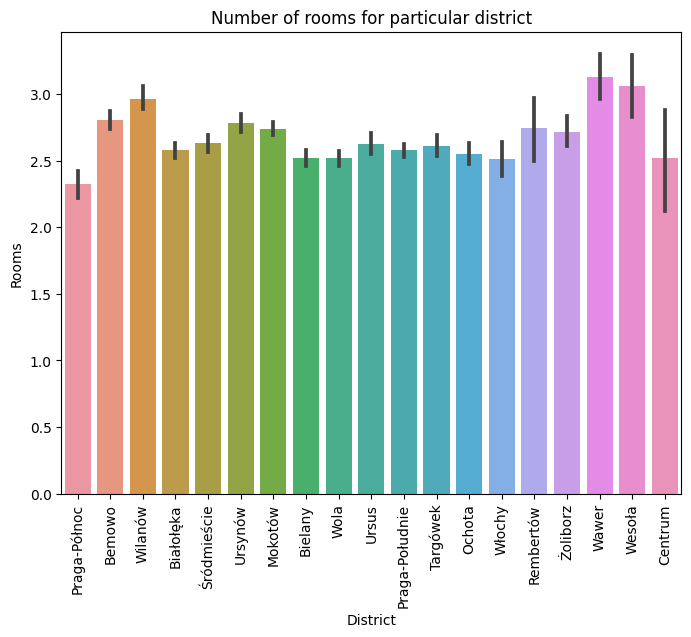

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="District", y="Rooms")
plt.title("Number of rooms for particular district")
plt.xticks(rotation = 90);

In [68]:
df.groupby("District")[["Price for house in zl","Size M2"]].mean().sort_values(ascending=True, by="Price for house in zl").round(2)

,Price for house in zl,Size M2
District,,
Białołęka,593151.37,57.55
Rembertów,614926.52,63.12
Ursus,620594.80,56.17
Targówek,623103.94,56.05
Praga-Północ,693720.42,51.23
Bielany,702853.05,54.56
Wesoła,715667.95,72.82
Włochy,727034.17,57.93
Praga-Południe,730698.81,56.79


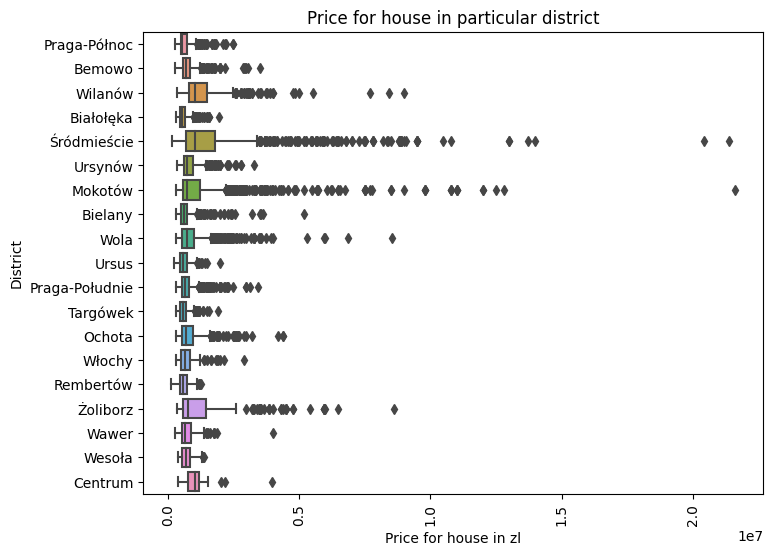

In [69]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y="District", x="Price for house in zl")
plt.title("Price for house in particular district")
plt.xticks(rotation = 90);

In [70]:
Above1mil = df[df["Price for house in zl"]>1000000]
print("Houses above one million zl:", len(Above1mil))
Below1mil = df[df["Price for house in zl"]<1000000]
print("Houses below one million zl:", len(Below1mil))

Houses above one million zl: 2464
Houses below one million zl: 8480


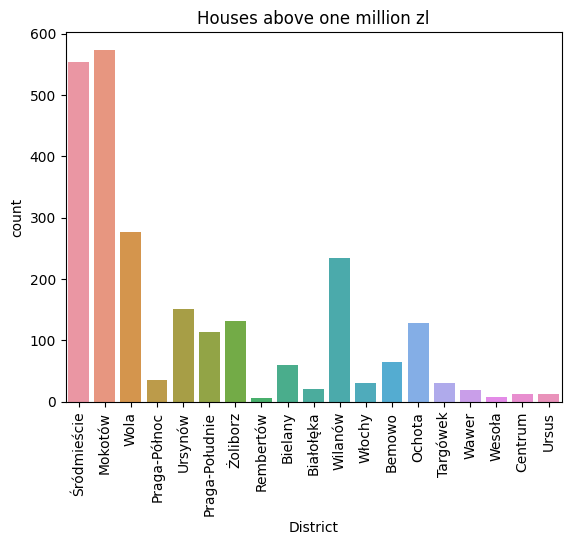

In [71]:
# Houses above one million zl
sns.countplot(data=Above1mil, x="District")
plt.title("Houses above one million zl")
plt.xticks(rotation = 90);

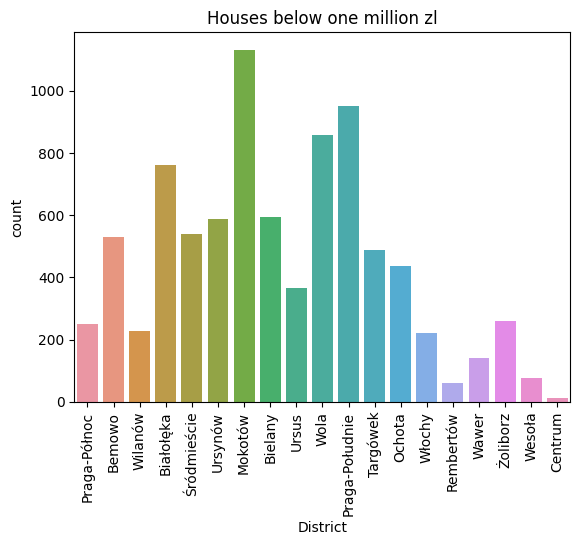

In [72]:
# Houses below one million zl
sns.countplot(data=Below1mil, x="District" )
plt.title("Houses below one million zl")
plt.xticks(rotation = 90);

## Conclusion

The average price of apartments in September 2022 per square meter in Warsaw is around 15 thousand zlotys, with the number of rooms averaging 2.65 and a floor area of 63 square meters.

The larger square meter is, the more we pay per square meter on average, also having a larger number of rooms with a square meter of about 24m2.

The cheapest apartments can be found in districts such as; Rembertów, Wesoła, Wawer, Białołęka, where we pay on average less than 11 thousand per m2. Also only in the districts of Wesoła and Wawer is the highest average number of rooms of slightly more than 3.

The most expensive apartments, on the other hand, are located in the city center where we spend on average as much as 21 thousand zlotys per m2. Also there, together with the Mokotow district, we can buy the most apartments for over a million zlotys.
